# Universidad Autónoma de Aguascalientes
# Departamento: Ciencias de la Computación
# Materia: Metaheurísticas I
# Profesor: Dr. Francisco Javier Luna Rosas
# Alumno: Haniel Joab Cruz Chávez
#### Semestre: Agosto-Diciembre 2025

## Actividad No. 7. Optimización por enjambre de partículas (PSO, por sus siglas en inglés, Particle Swarm Optimization)

### PSO es un algoritmo de optimización basado en la simulación de la conducta social de organismos, como bandadas de aves o bancos de peces. En esta práctica implementaremos PSO para buscar el optimo global de una funcion en 3D (minimo global): f(x, y) = x^2 + y^2 y la graficamos

## Paso 1: Importar las librerías necesarias


In [135]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

## Paso 2: Definir función objetivo.

In [136]:
# Definir la función objetivo: f(x, y) = x^2 + y^2
def objective_function(x):
    # x es un array de la forma [x, y]
    return x[0]**2 + x[1]**2

## Paso 3: Inicializar los parámetros del PSO


In [137]:
# Parámetros PSO
num_particles = 30
num_dimensions = 2
num_iterations = 100
w = 0.5  # Factor de inercia que controla la velocidad
c1 = 1.5  # Coeficiente cognitivo
c2 = 2.0  # Coeficiente social

# Limites de la búsqueda
bounds = (-10, 10)

history_positions = []

## Paso 4: Inicializamos las particulas y velocidades


In [138]:
# Inicializar las partículas
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# Inicializar las mejores posiciones individuales y globales
p_best_position = particles.copy()
p_best_value = np.array([objective_function(x) for x in particles])
g_best_position = p_best_position[np.argmin(p_best_value)] #minimo valor de xi
g_best_value = np.min(p_best_value) #valor de la funcion para la mejor xi

for t in range(num_iterations):
    for i in range(num_particles):
        # Evaluar la función objetivo
        fitness = objective_function(particles[i])

        # Actualizar la mejor posición individual
        if fitness < p_best_value[i]:
            p_best_value[i] = fitness
            p_best_position[i] = particles[i].copy()

        # Actualizar la mejor posición global
        if fitness < g_best_value:
            g_best_value = fitness
            g_best_position = particles[i].copy()

    # Actualizar velocidades y posiciones
    for i in range(num_particles):
        r1 = random.random()
        r2 = random.random()

        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (p_best_position[i] - particles[i])
                         + c2 * r2 * (g_best_position - particles[i]))

        particles[i] = particles[i] + velocities[i]

        # Respetar los límites de la búsqueda
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])

    history_positions.append(particles.copy()) #Para graficar

    print(f"Iteración {t+1}/{num_iterations}, Mejor valor global: {g_best_value}")

print(f"Mejor posición encontrada: {g_best_position}, con valor: {g_best_value}")

Iteración 1/100, Mejor valor global: 16.232093126523495
Iteración 2/100, Mejor valor global: 2.773156699677459
Iteración 3/100, Mejor valor global: 1.4602541552777353
Iteración 4/100, Mejor valor global: 0.3113508579384144
Iteración 5/100, Mejor valor global: 0.13330907319099206
Iteración 6/100, Mejor valor global: 0.13330907319099206
Iteración 7/100, Mejor valor global: 0.05750567599427688
Iteración 8/100, Mejor valor global: 0.05750567599427688
Iteración 9/100, Mejor valor global: 0.010871948096004731
Iteración 10/100, Mejor valor global: 0.010871948096004731
Iteración 11/100, Mejor valor global: 0.010871948096004731
Iteración 12/100, Mejor valor global: 0.005821139349834674
Iteración 13/100, Mejor valor global: 0.0006971013642780381
Iteración 14/100, Mejor valor global: 0.0006971013642780381
Iteración 15/100, Mejor valor global: 0.00031098216791422876
Iteración 16/100, Mejor valor global: 0.00031098216791422876
Iteración 17/100, Mejor valor global: 0.00018296678917574684
Iteración 1

## Paso 5: Graficar la función f(x, y) = x^2 + y^2

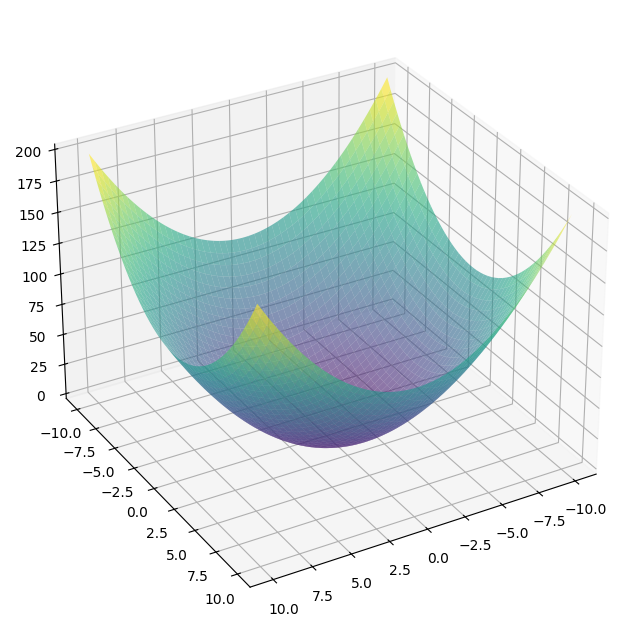

In [139]:
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.view_init(elev=30, azim=60)  # ángulo de cámara
ax.plot_surface(X, Y, Z, cmap = "viridis", alpha = 0.6)

## Paso 5.1 : Graficar la Función y la mejor posición final

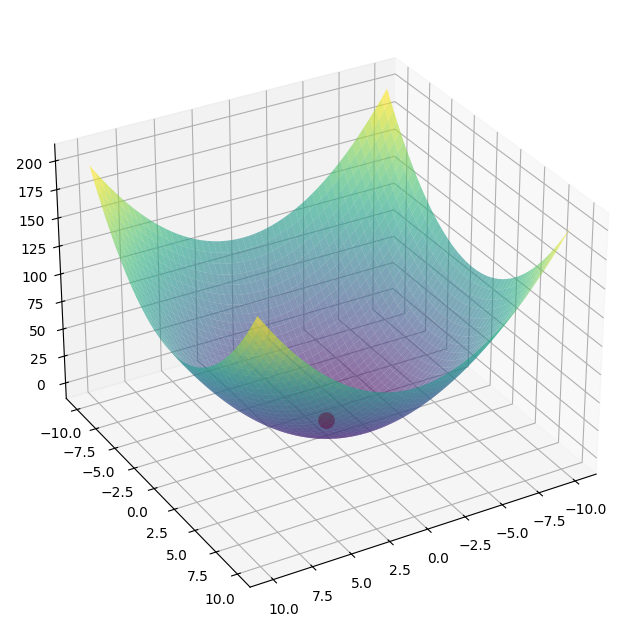

In [140]:
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, cmap = "viridis", alpha = 0.6)
ax.view_init(elev=30, azim=60)  # ángulo de cámara
ax.scatter(g_best_position[0], g_best_position[1], g_best_value, marker='o', color='red', linestyle='-', linewidth=2, s = 100, label = "Mejor Posición Encontrada")

## Paso 5.2 : Graficar la Función, la trayectoria de las partículas y la mejor posición final

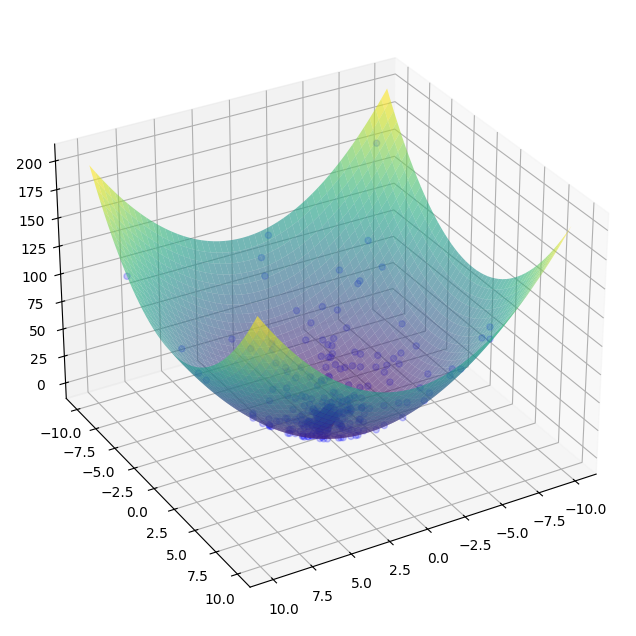

In [141]:
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, cmap = "viridis", alpha = 0.6)
ax.view_init(elev=30, azim=60)  # ángulo de cámara
for positions in history_positions:
    ax.scatter(positions[:, 0], positions[:, 1], [objective_function(pos) for pos in positions], color='blue', alpha=0.2)
ax.scatter(g_best_position[0], g_best_position[1], g_best_value, marker='o', color='red', linestyle='-', linewidth=2, s = 100, label = "Mejor Posición Encontrada")


## Conclusiones

### PSO es un algoritmo de optimización basado en la simulación de la conducta social de organismos, como bandadas de aves o bancos de peces. En esta practica implementamos PSO para buscar el optimo global de una función en 3D y la graficamos: (f(x, y) = x^2 + y^2).

## Bibliografia

### [1] KENNEY, James y EBERHART, Rusell C.. Particle Swarm Optimization. Neural Networks, 1995. Proceedings., IEEE International Conference on vol. 4 p. 1942-1948.